<a href="https://colab.research.google.com/github/albarrazikrillah14/PCD-PRAKTIKUM/blob/main/PCD4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import cv2
from google.colab.patches import cv2_imshow

In [2]:
#mount drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


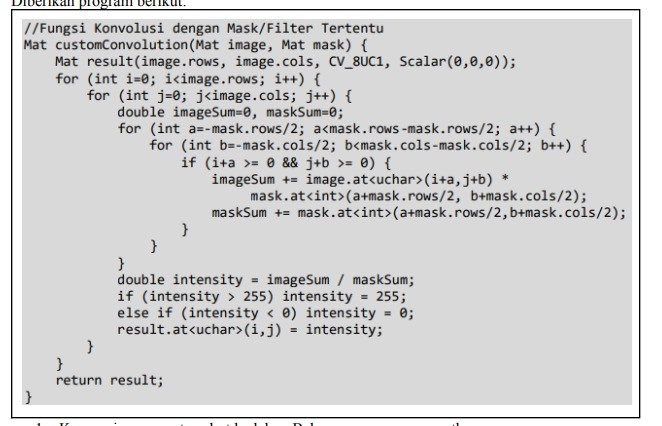

In [3]:
kode = cv2.imread("/content/drive/MyDrive/PCD/4/kode.jpeg")
cv2_imshow(kode)

In [38]:
#konversi kode diatas menjadi Python
def customConvolution(img, mask):
   row, col = img.shape[:2]
   rowMask, colMask = mask.shape[:2]
   canvas = np.zeros((row, col, 1), dtype="uint8")
   
   for i in range(0,row-1):
        for j in range(0,col-1):
            imgSum = 0; maskSum = 0
            for a in range(-int(rowMask/2) , rowMask - int(rowMask/2)):
                for b in range(-int(colMask/2), colMask - int(colMask/2)):
                    if (i + a >= 0) and (j + b >= 0):
                        imgSum = imgSum + img[i+a, j+b][0] * mask[a + int(rowMask/2)][b + int(colMask/2)]
                        maskSum = maskSum + mask[a + int(rowMask/2)][b + int(colMask/2)]
            intensity = imgSum / maskSum
            if intensity > 255:
                intensity = 255
            elif intensity < 0:
                intensity = 0
            canvas[i, j] = intensity
   return canvas

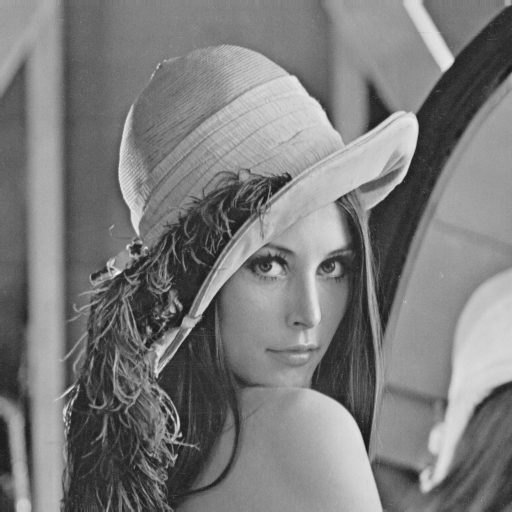

In [5]:
#baca citra lena
img = cv2.imread('/content/drive/MyDrive/PCD/4/lenna.png')
# cv2_imshow(img)

rows, cols = img.shape[:2]
#ubah kedalam grayscale
result = np.zeros((rows, cols, 1), np.uint8)
for i in range(rows):
  for j in range(cols):
    result[i, j] = (0.3 * img[i,j,2] + (0.59 * img[i,j,1]) + (0.11 * img[i,j, 0]))

cv2_imshow(result)

In [36]:
#kernel

lowPassKernel = np.array([[1, 1, 1],
                         [1, 1, 1],
                         [1, 1, 1]]) / 9

highPassKernel = np.array([[0, -1, 0],
                          [-1, 4, -1],
                          [0, -1, 0]])

directionalKernel = np.array([[-1, 0, 1],
                             [-1, 0, 1],
                             [-1, 0, 1]])



<ipython-input-38-2250a4b057e9>:15: RuntimeWarning: invalid value encountered in long_scalars
  intensity = imgSum / maskSum
<ipython-input-38-2250a4b057e9>:15: RuntimeWarning: divide by zero encountered in long_scalars
  intensity = imgSum / maskSum


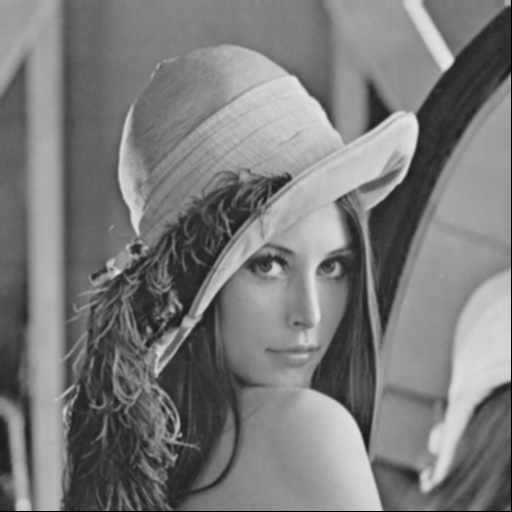

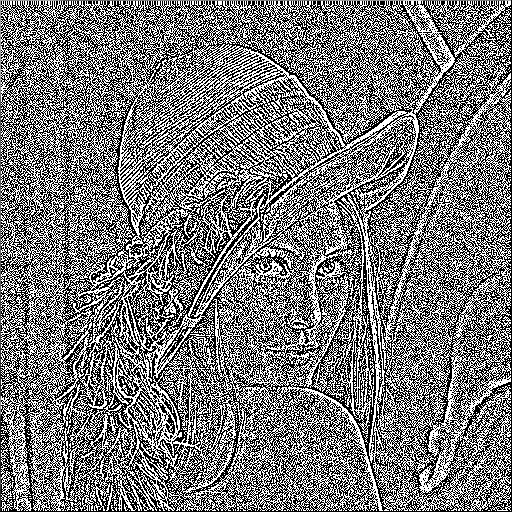

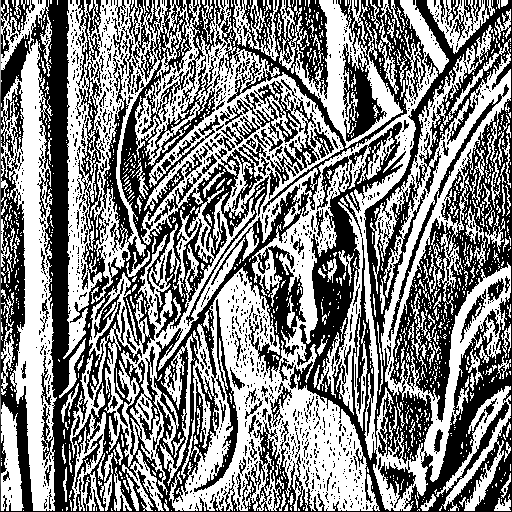

In [39]:
result_lpf = customConvolution(result, lowPassKernel)
result_hpf = customConvolution(result, highPassKernel)
result_dpf = customConvolution(result, directionalKernel)
cv2_imshow(result_lpf)
cv2_imshow(result_hpf)
cv2_imshow(result_dpf)
cv2.waitKey(0)
cv2.destroyAllWindows()